# Handin exercise for week 5: Pandas
### Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
        A. check the result
        B. in the code below this same get request is used to get information about all available data tables in 'databanken'.
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.


# Status:
### Done all the required exercises.

In [10]:
# Data Retrieved from #1.4: (Just for understanding)
# OMRÅDE;ALDER;CIVILSTAND;TID;INDHOLD
# Region Hovedstaden;54 år;I alt;2020K4;26788
# Region Hovedstaden;59 år;I alt;2020K4;21150
# Region Hovedstaden;100 år;I alt;2020K4;180
# Region Hovedstaden;105 år;I alt;2020K4;14
# Roskilde;54 år;I alt;2020K4;1471
# Roskilde;59 år;I alt;2020K4;1112
# Roskilde;100 år;I alt;2020K4;7
# Roskilde;105 år;I alt;2020K4;2

5 With data aggregation and data visualization answer the following questions:
    
    A. What is the change in pct of divorced danes from 2008 to 2020?
    B. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
    C. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
    D. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Setup, CSV file from: https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2020K1&CIVILSTAND=F
filename = './file_data/2008Divorce.csv'

ex5a_df = pd.read_csv(filename, delimiter=";")
#df.head()
data_5a_content = ex5a_df['INDHOLD']
#print(data_5a_content)
#1.5 A:
calculatePercentage(data_5a_content[0], data_5a_content[1])

26.983845694672436

In [57]:
# for 1.5A:
def calculatePercentage(old_number, new_number):
    return (((new_number - old_number) / old_number) * 100)

             Percent
OMRÅDE              
København  65.526071
Aalborg    54.803701
Aarhus     59.916202
Odense     55.167414
Esbjerg    47.826162


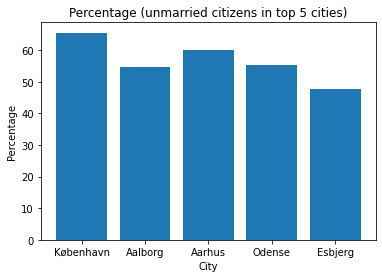

[65.52607123771973, 54.803701358167004, 59.91620151324872, 55.167413592592055, 47.82616219209372]


In [183]:
#   1.5B: Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
URL = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101%2C851%2C751%2C461%2C561&CIVILSTAND=U%2CTOT'
ex5b_df = pd.read_csv(URL, delimiter=";")

data_5a_total = ex5b_df[ex5b_df['CIVILSTAND'] == 'I alt']
data_5a_unmarried = ex5b_df[ex5b_df['CIVILSTAND'] == 'Ugift']

def calculate_percent(unmarried, total):
    return (unmarried/total) * 100

#print(data_5a_total)
#print(data_5a_unmarried)

#print("Total", data_5a_total['INDHOLD'][0:8:1])
#print("Unmarried", data_5a_unmarried['INDHOLD'][0:9:1])
#test_not_working_probably_need_loop = calculate_percent(data_5a_unmarried['INDHOLD'][0:9:1], data_5a_total['INDHOLD'][0:8:1])

# zip used cause we need to unpack 2 content daa (unmarried + total)
ex2_result = [calculate_percent(x, y) for x, y in zip(data_5a_unmarried['INDHOLD'], data_5a_total['INDHOLD'])]
#print(ex2_result)
#print(ex5b_df['OMRÅDE'][::2], ex2_result)

# In DataFrame: (note: not sure why there's not tables around it)
df = pd.DataFrame(data=ex2_result, 
                  columns=['Percent'],
                  index=ex5b_df['OMRÅDE'][::2])
print(df)

# In chart:
plt.title('Percentage (unmarried citizens in top 5 cities)')
plt.xlabel('City')
plt.ylabel('Percentage')
plt.bar(ex5b_df['OMRÅDE'][::2], ex2_result)
plt.show()
print(ex2_result)

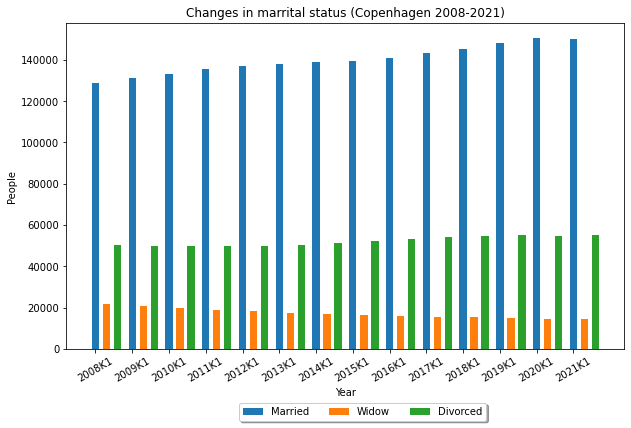

In [295]:
#  1.5C: Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
URL = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=U%2CG%2CE%2CF&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1'
ex5C_df = pd.read_csv(URL, delimiter=";")
#print(ex5C_df)

data_5c_unmarried = ex5C_df[ex5C_df['CIVILSTAND'] == 'Ugift']
data_5c_married_or_separated = ex5C_df[ex5C_df['CIVILSTAND'] == 'Gift/separeret']
data_5c_widow = ex5C_df[ex5C_df['CIVILSTAND'] == 'Enke/enkemand']
data_5c_divorced = ex5C_df[ex5C_df['CIVILSTAND'] == 'Fraskilt']

plt.figure(figsize=[10,6])
height = np.arange(len(data_5c_married_or_separated['TID']))

#plt.bar(height-0.3, data_5c_unmarried['INDHOLD'], width=0.2, label="Unmarried")
plt.bar(height, data_5c_married_or_separated['INDHOLD'], width=0.2, label="Married")
plt.bar(height+0.3, data_5c_widow['INDHOLD'], width=0.2, label="Widow")
plt.bar(height+0.6, data_5c_divorced['INDHOLD'], width=0.2, label="Divorced")

plt.title('Changes in marrital status (Copenhagen 2008-2021)')
plt.xlabel('Year')
plt.ylabel('People')
plt.xticks(height, data_5c_married_or_separated['TID'], rotation=30) # this displays years on X axe.
plt.legend(loc='upper left',bbox_to_anchor=(0.3, -0.15), shadow=True, ncol=3)

plt.show()

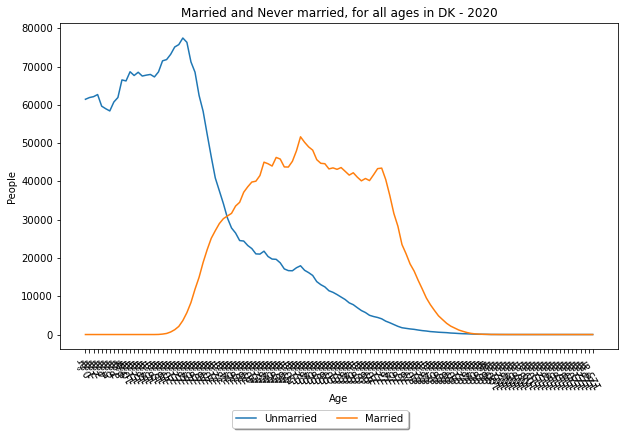

In [378]:
# 1.5D: Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 
# (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
URL = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&Tid=2020K1&ALDER=*'
ex5D_df = pd.read_csv(URL, delimiter=";")

data_5d_unmarried = ex5D_df[ex5D_df['CIVILSTAND'] == 'Ugift']
data_5d_married_or_separated = ex5D_df[ex5D_df['CIVILSTAND'] == 'Gift/separeret']

plt.figure(figsize=[10,6])
# [1:] to remove the total. take from second element, instead of first that contains the 'Total'
plt.plot(list(data_5d_unmarried['ALDER'][1:]), list(data_5d_unmarried['INDHOLD'][1:]), label="Unmarried")
plt.plot(list(data_5d_married_or_separated['ALDER'][1:]), list(data_5d_married_or_separated['INDHOLD'][1:]), label="Married")

plt.title('Married and Never married, for all ages in DK - 2020')
plt.xlabel('Age')
plt.ylabel('People')
plt.xticks(rotation=120) #idk, attempt to fix the weird margin bottom text
plt.legend(loc='upper left',bbox_to_anchor=(0.3, -0.17), shadow=True, ncol=3)

plt.show()